In [1]:
import pickle as pkl
import sys
import torch
import builder
import torchvision.models as models
import numpy as np
import torchvision.datasets as datasets
from torchvision import transforms

In [3]:

model_names = sorted(name for name in models.__dict__
    if name.islower() and not name.startswith("__")
    and callable(models.__dict__[name]))

model = models.__dict__['resnet50']()

for name, param in model.named_parameters():
    if name not in ['fc.weight', 'fc.bias']:
        param.requires_grad = False



In [4]:

input = 'moco_v1_200ep_pretrain.pth.tar'
checkpoint = torch.load(input, map_location="cpu")
state_dict = checkpoint["state_dict"]
for k in list(state_dict.keys()):
    if k.startswith('module.encoder_q') and not k.startswith('module.encoder_q.fc'):
        # remove prefix
        state_dict[k[len("module.encoder_q."):]] = state_dict[k]
    # delete renamed or unused k
    del state_dict[k]
    
    msg = model.load_state_dict(state_dict, strict=False)
    #assert set(msg.missing_keys) == {'fc.weight', "fc.bias"}
    print(k)


module.encoder_q.conv1.weight
module.encoder_q.bn1.weight
module.encoder_q.bn1.bias
module.encoder_q.bn1.running_mean
module.encoder_q.bn1.running_var
module.encoder_q.bn1.num_batches_tracked
module.encoder_q.layer1.0.conv1.weight
module.encoder_q.layer1.0.bn1.weight
module.encoder_q.layer1.0.bn1.bias
module.encoder_q.layer1.0.bn1.running_mean
module.encoder_q.layer1.0.bn1.running_var
module.encoder_q.layer1.0.bn1.num_batches_tracked
module.encoder_q.layer1.0.conv2.weight
module.encoder_q.layer1.0.bn2.weight
module.encoder_q.layer1.0.bn2.bias
module.encoder_q.layer1.0.bn2.running_mean
module.encoder_q.layer1.0.bn2.running_var
module.encoder_q.layer1.0.bn2.num_batches_tracked
module.encoder_q.layer1.0.conv3.weight
module.encoder_q.layer1.0.bn3.weight
module.encoder_q.layer1.0.bn3.bias
module.encoder_q.layer1.0.bn3.running_mean
module.encoder_q.layer1.0.bn3.running_var
module.encoder_q.layer1.0.bn3.num_batches_tracked
module.encoder_q.layer1.0.downsample.0.weight
module.encoder_q.layer1.

module.encoder_q.layer3.2.bn3.bias
module.encoder_q.layer3.2.bn3.running_mean
module.encoder_q.layer3.2.bn3.running_var
module.encoder_q.layer3.2.bn3.num_batches_tracked
module.encoder_q.layer3.3.conv1.weight
module.encoder_q.layer3.3.bn1.weight
module.encoder_q.layer3.3.bn1.bias
module.encoder_q.layer3.3.bn1.running_mean
module.encoder_q.layer3.3.bn1.running_var
module.encoder_q.layer3.3.bn1.num_batches_tracked
module.encoder_q.layer3.3.conv2.weight
module.encoder_q.layer3.3.bn2.weight
module.encoder_q.layer3.3.bn2.bias
module.encoder_q.layer3.3.bn2.running_mean
module.encoder_q.layer3.3.bn2.running_var
module.encoder_q.layer3.3.bn2.num_batches_tracked
module.encoder_q.layer3.3.conv3.weight
module.encoder_q.layer3.3.bn3.weight
module.encoder_q.layer3.3.bn3.bias
module.encoder_q.layer3.3.bn3.running_mean
module.encoder_q.layer3.3.bn3.running_var
module.encoder_q.layer3.3.bn3.num_batches_tracked
module.encoder_q.layer3.4.conv1.weight
module.encoder_q.layer3.4.bn1.weight
module.encoder_q

In [5]:
for i in model.state_dict():
    print(i, model.state_dict()[i].size())

conv1.weight torch.Size([64, 3, 7, 7])
bn1.weight torch.Size([64])
bn1.bias torch.Size([64])
bn1.running_mean torch.Size([64])
bn1.running_var torch.Size([64])
bn1.num_batches_tracked torch.Size([])
layer1.0.conv1.weight torch.Size([64, 64, 1, 1])
layer1.0.bn1.weight torch.Size([64])
layer1.0.bn1.bias torch.Size([64])
layer1.0.bn1.running_mean torch.Size([64])
layer1.0.bn1.running_var torch.Size([64])
layer1.0.bn1.num_batches_tracked torch.Size([])
layer1.0.conv2.weight torch.Size([64, 64, 3, 3])
layer1.0.bn2.weight torch.Size([64])
layer1.0.bn2.bias torch.Size([64])
layer1.0.bn2.running_mean torch.Size([64])
layer1.0.bn2.running_var torch.Size([64])
layer1.0.bn2.num_batches_tracked torch.Size([])
layer1.0.conv3.weight torch.Size([256, 64, 1, 1])
layer1.0.bn3.weight torch.Size([256])
layer1.0.bn3.bias torch.Size([256])
layer1.0.bn3.running_mean torch.Size([256])
layer1.0.bn3.running_var torch.Size([256])
layer1.0.bn3.num_batches_tracked torch.Size([])
layer1.0.downsample.0.weight torch

layer4.0.bn2.running_mean torch.Size([512])
layer4.0.bn2.running_var torch.Size([512])
layer4.0.bn2.num_batches_tracked torch.Size([])
layer4.0.conv3.weight torch.Size([2048, 512, 1, 1])
layer4.0.bn3.weight torch.Size([2048])
layer4.0.bn3.bias torch.Size([2048])
layer4.0.bn3.running_mean torch.Size([2048])
layer4.0.bn3.running_var torch.Size([2048])
layer4.0.bn3.num_batches_tracked torch.Size([])
layer4.0.downsample.0.weight torch.Size([2048, 1024, 1, 1])
layer4.0.downsample.1.weight torch.Size([2048])
layer4.0.downsample.1.bias torch.Size([2048])
layer4.0.downsample.1.running_mean torch.Size([2048])
layer4.0.downsample.1.running_var torch.Size([2048])
layer4.0.downsample.1.num_batches_tracked torch.Size([])
layer4.1.conv1.weight torch.Size([512, 2048, 1, 1])
layer4.1.bn1.weight torch.Size([512])
layer4.1.bn1.bias torch.Size([512])
layer4.1.bn1.running_mean torch.Size([512])
layer4.1.bn1.running_var torch.Size([512])
layer4.1.bn1.num_batches_tracked torch.Size([])
layer4.1.conv2.weight

In [6]:
print(model.state_dict()['fc.bias'])

tensor([ 1.8423e-03, -2.5812e-03,  1.3097e-02,  1.0533e-02, -4.2889e-03,
         8.7078e-03,  2.0100e-02,  1.3410e-02, -4.6090e-03,  6.5184e-03,
         1.1945e-03,  4.3745e-03,  1.4163e-02, -6.2773e-03,  1.9305e-02,
        -6.8347e-03, -7.2247e-03,  8.0297e-03, -1.0948e-02, -2.0684e-02,
        -7.9483e-03,  7.0219e-03,  9.9971e-03,  9.7618e-03,  3.2804e-03,
         2.0252e-02, -2.2024e-02, -1.5278e-02,  1.4634e-02,  6.2974e-03,
         1.1377e-02, -1.5862e-02,  2.0704e-02, -1.1020e-02,  9.0964e-03,
         1.2728e-02, -2.0445e-02,  4.0786e-03,  2.0076e-02, -1.8543e-02,
         2.8509e-03, -7.5859e-04, -1.5213e-02,  1.1762e-02,  6.3662e-03,
        -1.5895e-02,  6.8770e-03,  1.8613e-02, -1.2162e-02, -8.6023e-03,
        -1.5756e-02, -3.2774e-03, -1.6350e-02,  4.2777e-03, -5.7489e-03,
         1.9631e-02, -5.4668e-03,  1.5512e-02, -1.6070e-02,  7.8258e-03,
         1.7628e-02, -2.0675e-02, -2.9560e-03,  2.2001e-02,  1.1046e-02,
        -1.6521e-02,  4.5901e-03,  8.6608e-03, -1.6

In [31]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device('cpu')
image = torch.from_numpy(np.random.rand(3,224,224)).float().to(device)
image = image.unsqueeze(0)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [34]:
model(image).shape

torch.Size([1, 1000])

In [29]:
image.shape

torch.Size([1, 3, 224, 224])

# Checking the Dataloader


In [19]:
import pickle as pkl
import sys
import torch
import builder
import torchvision.models as models
import numpy as np
import torchvision.datasets as datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [12]:
# transforms = transforms.Compose([
#     transforms.ToPILImage(),
#     transforms.RandomResizedCrop(size=32, scale=(0.2, 1.)),
#     transforms.ToTensor(),
# ])
transforms = None

test_2007_data = datasets.VOCDetection('datasets/',year='2007',image_set='test',download =False, transform = transforms)
train_2007_data= datasets.VOCDetection('datasets/',year='2007',image_set='train',download =False, transform = transforms)
train_2012_data = datasets.VOCDetection('datasets/',year='2012',image_set='train',download =False, transform = transforms)
val_2007_data = datasets.VOCDetection('datasets/',year='2007',image_set='val',download =False, transform = transforms)
val_2012_data = datasets.VOCDetection('datasets/',year='2012',image_set='val',download =False, transform = transforms)

In [13]:
print(test_2007_data)
print(train_2007_data)
print(train_2012_data)
print(val_2007_data)
print(val_2012_data)

Dataset VOCDetection
    Number of datapoints: 4952
    Root location: datasets/
Dataset VOCDetection
    Number of datapoints: 2501
    Root location: datasets/
Dataset VOCDetection
    Number of datapoints: 5717
    Root location: datasets/
Dataset VOCDetection
    Number of datapoints: 2510
    Root location: datasets/
Dataset VOCDetection
    Number of datapoints: 5823
    Root location: datasets/


In [4]:
train_loader = torch.utils.data.DataLoader(
        train_2012_data, batch_size= 4, shuffle=True,
        num_workers=2)
val_loder = torch.utils.data.DataLoader(
        val_2012_data, batch_size= 4, shuffle=True,
        num_workers=2)

In [5]:
for i, (images, target) in enumerate(train_loader):
    print(i)

TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/nishraptor/venv/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/nishraptor/venv/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/nishraptor/venv/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/nishraptor/venv/lib/python3.8/site-packages/torchvision/datasets/voc.py", line 210, in __getitem__
    img, target = self.transforms(img, target)
  File "/home/nishraptor/venv/lib/python3.8/site-packages/torchvision/datasets/vision.py", line 61, in __call__
    input = self.transform(input)
  File "/home/nishraptor/venv/lib/python3.8/site-packages/torchvision/transforms/transforms.py", line 61, in __call__
    img = t(img)
  File "/home/nishraptor/venv/lib/python3.8/site-packages/torchvision/transforms/transforms.py", line 127, in __call__
    return F.to_pil_image(pic, self.mode)
  File "/home/nishraptor/venv/lib/python3.8/site-packages/torchvision/transforms/functional.py", line 100, in to_pil_image
    raise TypeError('pic should be Tensor or ndarray. Got {}.'.format(type(pic)))
TypeError: pic should be Tensor or ndarray. Got <class 'PIL.Image.Image'>.


0 (<PIL.Image.Image image mode=RGB size=353x500 at 0x7F9E4C461490>, {'annotation': {'folder': 'VOC2007', 'filename': '000001.jpg', 'source': {'database': 'The VOC2007 Database', 'annotation': 'PASCAL VOC2007', 'image': 'flickr', 'flickrid': '341012865'}, 'owner': {'flickrid': 'Fried Camels', 'name': 'Jinky the Fruit Bat'}, 'size': {'width': '353', 'height': '500', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'dog', 'pose': 'Left', 'truncated': '1', 'difficult': '0', 'bndbox': {'xmin': '48', 'ymin': '240', 'xmax': '195', 'ymax': '371'}}, {'name': 'person', 'pose': 'Left', 'truncated': '1', 'difficult': '0', 'bndbox': {'xmin': '8', 'ymin': '12', 'xmax': '352', 'ymax': '498'}}]}})


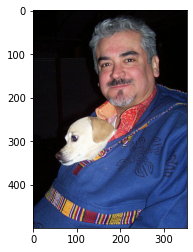

In [27]:
import matplotlib.patches as patches

for i in range(len(test_2007_data)):
    sample = test_2007_data[i]
    print(i, sample)
    plt.imshow(sample[0])
    #rect = patches.Rectangel((sample['']))
    plt.plot
    break